<a href="https://colab.research.google.com/github/2Lahari2/knowledge_graph/blob/main/KNOWLEDGE_GRAPH_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all the libraries needed
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy


from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [ ]:
!python -m spacy download en_core_web_md

     |████████████████████████████████| 96.4 MB 1.1 MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-py3-none-any.whl size=98051301 sha256=14041d9b9ca8d136fccfb071e5361c888f00a1520da11f8af08f549552f1fb58
  Stored in directory: /tmp/pip-ephem-wheel-cache-tn8ndpal/wheels/69/c5/b8/4f1c029d89238734311b3269762ab2ee325a42da2ce8edb997
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:

nlp = spacy.load("en_core_web_sm")

In [ ]:
#importing excel file with the extension .csv
from google.colab import files
 
 
uploaded = files.upload()

Saving list.csv to list.csv


In [ ]:
info = pd.read_csv('list.csv')  # if the file is imported in colab 
#info = pd.read_csv('C:\Users\Dell\OneDrive\Desktop\list.csv') - if the file is accessed directly, copy paste the location inside the pd.read_csv('location')
info.shape
info

,S.NO,NAME OF THE SCHEME,AGE ELIGIBILITY,GENDER ELIGIBILITY,ADDITIONAL ELIGIBILITY
0,1,Pradhan Mantri Jan Dhan Yojana(PMJDY),>10,None,Nationality:Indian
1,2,Sukanya Samriddhi Yojana,>10,Female,Nationality:Indian
2,3,Senior Citizen Savings Scheme,>60,None,Nationality:Indian
3,4,Public Provident Fund account,>18,None,Nationality:Indian
4,5,National Pension Scheme,">18,<50",None,"Nationality:Indian, 10 years of service"
5,6,Gold Banking,>18,None,None
6,7,Standup India Scheme,>18,Female,"Nationality:Indian,Greenfield projects , Non individuals such as existing firms and businesses can apply but 51% of share holding must be held by SC/ ST and/or women enterpreneurs"
7,8,Pradhan Mantri Mudra Yojana,">18,<65",None,Nationality:Indian
8,9,Deendayal Antyodaya Yojana,>18,None,"Nationality:Indian,Can be availed by non-who were part of Ajeevika Program"


In [ ]:
# seperating the details presented in the data
from tqdm import tqdm
schemes = []
age = []
gender = []
add = []
for i in (tqdm(info["NAME OF THE SCHEME"])):
  schemes.append(i)
for i in (tqdm(info["AGE ELIGIBILITY"])):
  if i != 'nan':
    age.append(i)
  else:
    age.append('None')
for i in (tqdm(info["GENDER ELIGIBILITY"])):
  if i != 'None':
    gender.append(i)
  else:
    gender.append('male female')
for i in (tqdm(info["ADDITIONAL ELIGIBILITY"])):
  if i != 'nan':
    add.append(i)
  else:
    add.append('None')

100%|██████████| 9/9 [00:00<00:00, 60983.42it/s]


In [ ]:
# defining source nodes, destination nodes and their edge values
source1 = [i for i in age]
target1 = [i for i in schemes]
gender1 = [i for i in gender]
#graph1 mapping age eligibilty for schemes
kg_df = pd.DataFrame({'source':source1, 'target':target1, 'edge': 'age eligibility' })
print(kg_df)
#graph2 mapping gender eligibility for schemes
kg_df2 = pd.DataFrame({'source':gender1,'target':target1,'edge':'gender eligibility'})

    source                                 target             edge
0      >10  Pradhan Mantri Jan Dhan Yojana(PMJDY)  age eligibility
1      >10               Sukanya Samriddhi Yojana  age eligibility
2      >60          Senior Citizen Savings Scheme  age eligibility
3      >18          Public Provident Fund account  age eligibility
4  >18,<50                National Pension Scheme  age eligibility
5      >18                           Gold Banking  age eligibility
6      >18                   Standup India Scheme  age eligibility
7  >18,<65           Pradhan Mantri Mudra Yojana   age eligibility
8      >18             Deendayal Antyodaya Yojana  age eligibility


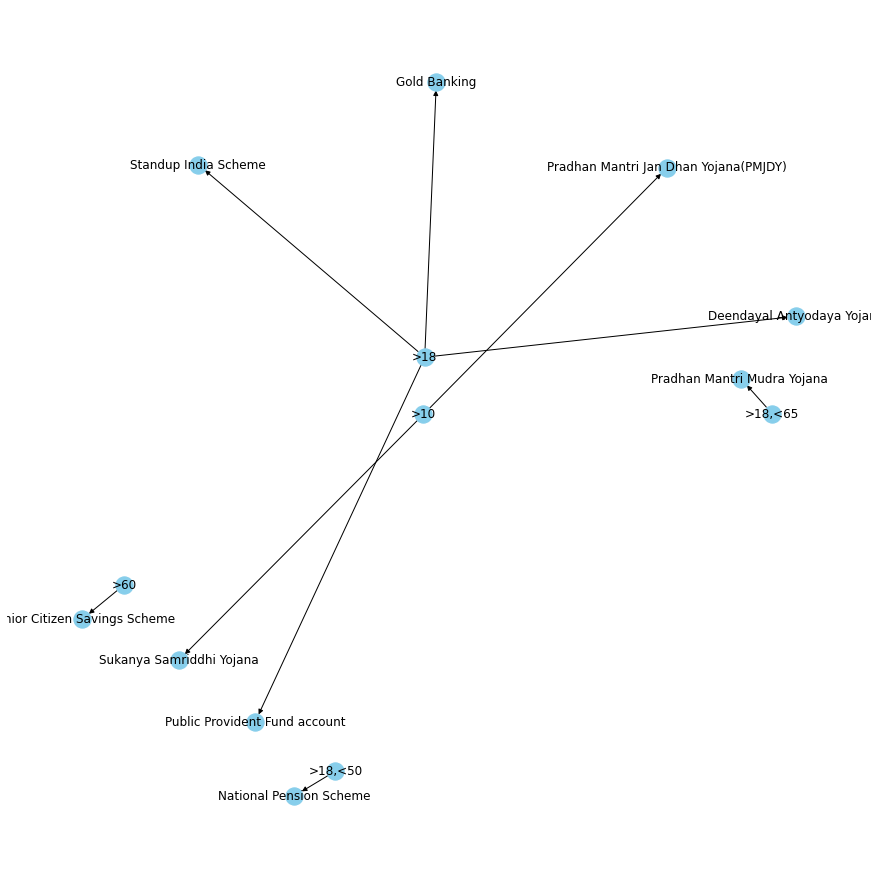

In [ ]:
# graph1
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue',edge_cmap=plt.cm.Blues, pos = pos)

plt.show()

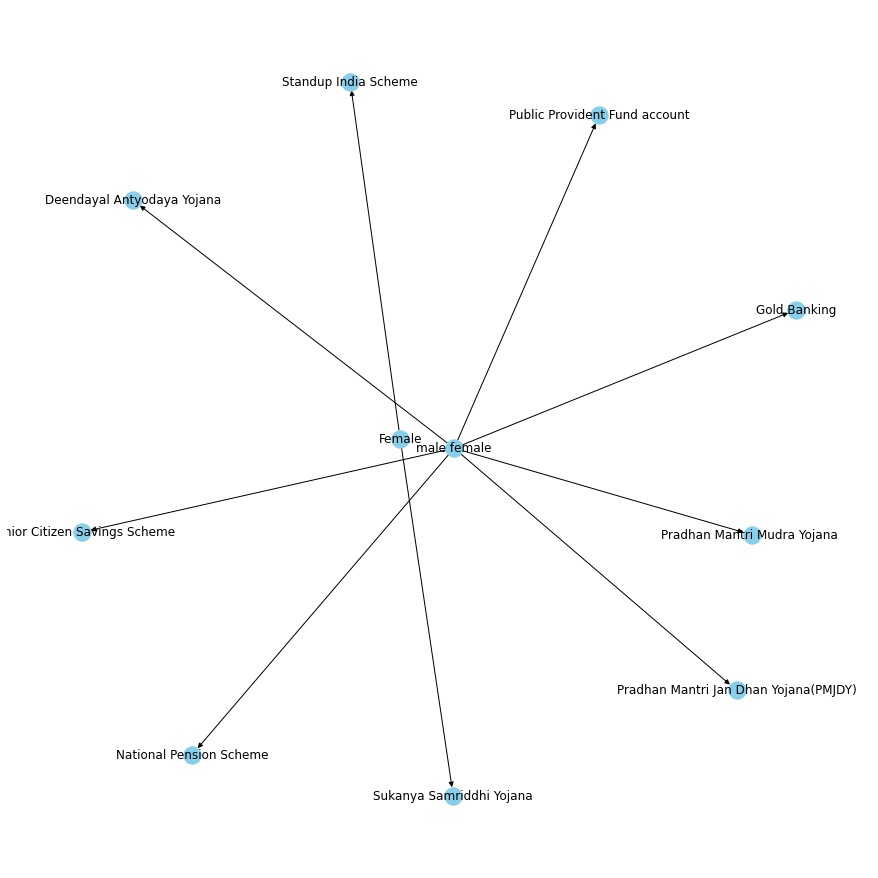

In [ ]:
#graph2
H=nx.from_pandas_edgelist(kg_df2, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))

pos = nx.spring_layout(H)
nx.draw(H, with_labels=True, node_color='skyblue',edge_cmap=plt.cm.Blues, pos = pos)

plt.show()

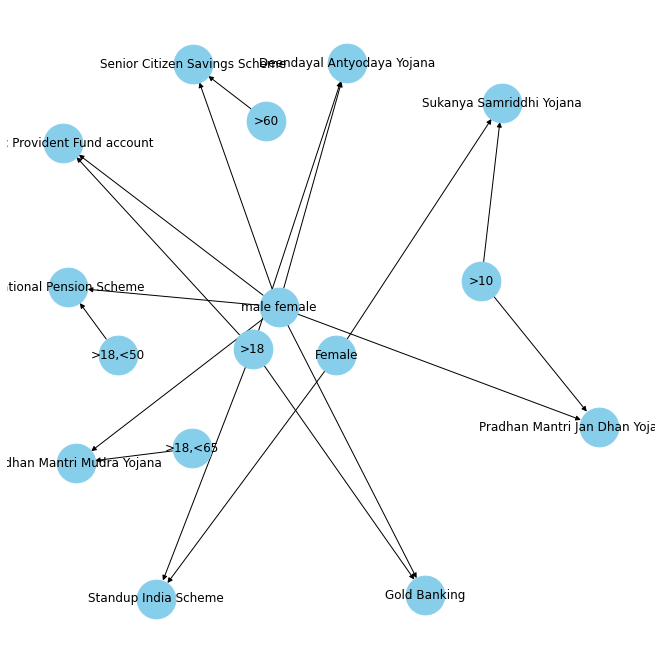

In [ ]:
#combining graph1 and graph2
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']== 'age eligibility'], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
G.add_nodes_from(H)
G.add_edges_from(H.edges)
plt.figure(figsize=(9,9))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)

plt.show()